# Introduction to regression models

Import relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [3]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

In [6]:
# Arthuro
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
#Dataframe unique value, using .value_counts()
wine_df.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6          4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6          4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7          4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5          4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      5          3
                     

In [11]:
#Dataframe description (count, mean, max, min, ...) using .describe()
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
#Dataframe dimension (using .shape)
wine_df.shape

(1599, 12)

Get 100 samples with random state (seed) = 1

In [15]:
#Arthuro example

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
529,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
912,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


In [9]:
#(n = number of samples, random_state = randomizing the samples that we get)
wine_sample_df = wine_df.sample(n=100, random_state=1)
wine_sample_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
75,8.8,0.410,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5
1283,8.7,0.630,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6
1281,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6
1118,7.1,0.390,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
529,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
912,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,6
1227,9.0,0.580,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,5
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3


## Create your own linear model

Plot pH in function of fixed acidity

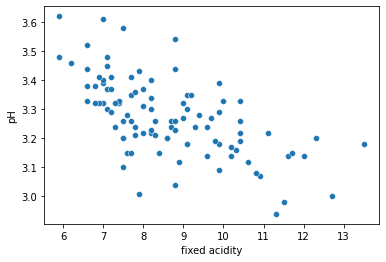

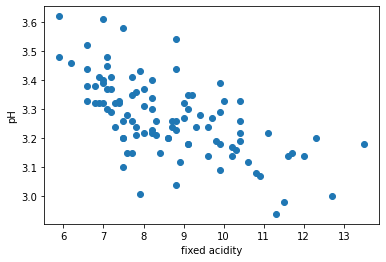

In [40]:
#  Store fixed acidity (x axis) and pH (y axis)
x_axis = wine_sample_df['fixed acidity']
y_axis = wine_sample_df['pH']

# Define x and y name label
plt.xlabel("fixed acidity")
plt.ylabel("pH")

# Use matplotlib .scatter()
plt.scatter(x_axis,y_axis)

What can you say about pH and fixed acidity? are they correlated ? 

#### According to the scatter plot, we can say that pH and fixed acidity are negatively correlated.
#### We will calculate the coef using numpy.

In [28]:
# Finding correlation coef using numpy.corrcoef(x, y)
# With x = fixed acidity values and y = pH values
correlation_coef = np.corrcoef(x_axis,y_axis)
correlation_coef

array([[ 1.       , -0.6199411],
       [-0.6199411,  1.       ]])

#### Correlation coefficient = -0.6199411
##### We can now confirm that pH and fixed acidity are negatively correlated

Try to find a linear model by hand. plot it with the sample set

Hint: define an intercept and slope. Then, plot it graphically

y = a * x + b, where a is slope and b is intercept

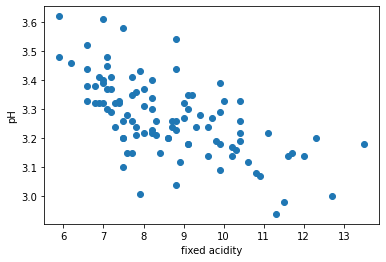

what is the best linear model you can find ? try to define different intercepts and slopes by hand

Compare to seaborn regplot

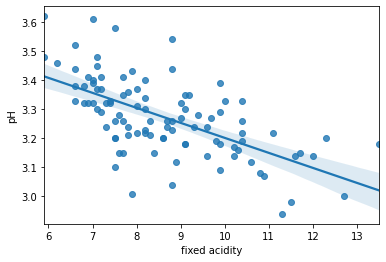

In [40]:
sns.regplot(y='pH', x='fixed acidity', data=sample_wine_df);

In [32]:
# plot your linear model with regplot and compare

How far is your linear model from seaborn model?

How do you evaluate the performance of your linear models at each iteration ?

Try to create a method where each time you define a slope or intercept, you reduce the error of the model. Then, you iterate to find the best model

Hint: choose a fixed intercept, find the slope that reduce the error of the model. Then keep that slope, find the new intercept that reduce the error of the model ...

How many iterations did you tried ? what are the best intercept and slope you found? Are you closer to the seaborn linear model ?  

According to you ... is this the OLS method ? can you describe with your own words, how it works? how different is from your method ?

Compare with the Linear regression used in scikit learn

In [ ]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = sample_wine_df[['fixed acidity']]
y = sample_wine_df['pH']

# Train the model on the data
model.fit(X, y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)

Are you close to these values ?

How do you interpret these values? What do they say about the pH and fixed acidity?

## inference analysis

Get a new sample of 100 with different random state (seed) = 60

Does your best linear model fit with this new sample set ?  Why ?


How can you solve the problem ?

# Predict wine quality - regression problem

## Simple Linear regression

Let's try to create a new linear regression. This time, try to find the best model to predict quality in function of pH

Follow the same steps as before: 
- choose a random sample with fixed seed
- use seaborn to see the linear model in this sample
- calculate the best linear regression
- check if the model fits with a new sample

How good is this model performing? What is the error? is it low or high ?

### Using Holdout method 

Use train split method to divide the dataset in 70% train set and 30% test set

In [ ]:
from sklearn.model_selection import train_test_split

# Choose your feature and your target
X = sample_wine_df[['pH']]
y = sample_wine_df['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

Is this score good or bad? What does it means? 

Try another feature. Replace pH with fixed acidity, volatile acidity, ...

Which feature increases this value? 

Do you think you can do better ?

## Multi linear regression

Let's add multiple features in the regression model. Then create a new model and compare your results with Simple regression. Is it better or worst? 

In [ ]:
X = sample_wine_df[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]

Try with all the features (all without column quality of course). 

Create a new model and compare with the last one. Is it better? Why? 



If you add the column quality in the variable X, what would happen ? 

Do you think that there are features that are not helping to increase the performance? Which ones do you suspect? 

Do you know a method to identify them? 

How can you find the best combination of features to increase the performance of the model?

# Predict wine quality - classification problem

## convert quality column in 2 classes

Create a classification version (good or bad) of target variable (quality). To do so, let's consider that the wine with quality equal of higher than 7 is good quality and the rest bad quality. 

You can call the new column goodquality

In [35]:
# Create Classification version of target variable


# Separate feature variables and target variable



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


How many samples are considered as good and how many are bad? Is this balanced

## Simple Logistic regression

Try to create a first logistic regression model from a sample

In classification, how do you evaluate the performance of the model ?

Try different pair of data sets: (pH, goodquality), (fixed acidity, goodquality), (alcohol, goodquality) 

Which pair performs better?

## Multi logistic regression

Add new features to the model, try to find the best model reducing the error. 

Use everything you learned so far and good luck :)